## UPLOADING RAW DATA
Uploading exoTest.csv file for data testing

In [55]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('exoTest.csv.zip')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the data:")
print(df.head())

# Get a summary of the DataFrame (number of rows, columns, data types)
print("\nDataFrame information:")
df.info()

# Get a statistical summary of the numerical columns
print("\nStatistical summary of the data:")
print(df.describe())

# Check the number of each label in the 'LABEL' column
print("\nNumber of confirmed exoplanets vs. non-exoplanets:")
print(df['LABEL'].value_counts())

First 5 rows of the data:
   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0      2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1      2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2      2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3      2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4      2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   

    FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0     6.98     6.63  ...      14.52      19.29      14.44      -1.62   
1  5569.47  5550.44  ...    -581.91    -984.09   -1230.89   -1600.45   
2   362.95   207.27  ...      17.82     -51.66     -48.29     -59.99   
3  -746.50  -709.53  ...     122.34      93.03      93.03      68.81   
4   -45.20    -5.04  ...     -37.87     -61.85     -27.15     -21.18   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      13.33      45

## HANDLING MISSING VALUES & FEATURE ENGINEERING

Separating data and labels

In [56]:
# Create a DataFrame for features (all columns except 'LABEL')
features = df.drop('LABEL', axis=1)

# Create a Series for labels (the 'LABEL' column)
labels = df['LABEL']

print("Shape of features DataFrame:", features.shape)
print("Shape of labels Series:", labels.shape)

Shape of features DataFrame: (570, 3197)
Shape of labels Series: (570,)


Creating first features

In [57]:
import numpy as np

# Create new features from the light curve data

# 1. Mean Flux: The average brightness of the star over time.
# The mean is a simple but powerful feature.
features['mean_flux'] = features.mean(axis=1)

# 2. Standard Deviation of Flux: How much the brightness varies.
# This helps the model spot a periodic dip.
features['std_flux'] = features.std(axis=1)

# 3. Maximum Flux: The brightest the star got.
features['max_flux'] = features.max(axis=1)

# 4. Minimum Flux: The dimmest the star got.
features['min_flux'] = features.min(axis=1)

# Display the new features along with the first few original flux columns
print("\nDataFrame with new features:")
print(features.head())


DataFrame with new features:
    FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7   FLUX.8  \
0   119.88   100.21    86.46    48.68    46.12    39.39    18.57     6.98   
1  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39  5569.47   
2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   362.95   
3  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22  -746.50   
4   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   -45.20   

    FLUX.9  FLUX.10  ...  FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  \
0     6.63   -21.97  ...      13.33      45.50      31.93      35.78   
1  5550.44  5458.80  ...   -1824.53   -2061.17   -2265.98   -2366.19   
2   207.27   150.46  ...     -82.10    -174.54     -95.23    -162.68   
3  -709.53  -679.56  ...       9.81      20.75      20.25    -120.81   
4    -5.04    14.62  ...     -33.76     -85.34     -81.46     -61.98   

   FLUX.3196  FLUX.3197  mean_flux     std_flux  max_flux  min_flux  
0   

Starting Feature Engineering

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing Raw Light Curves

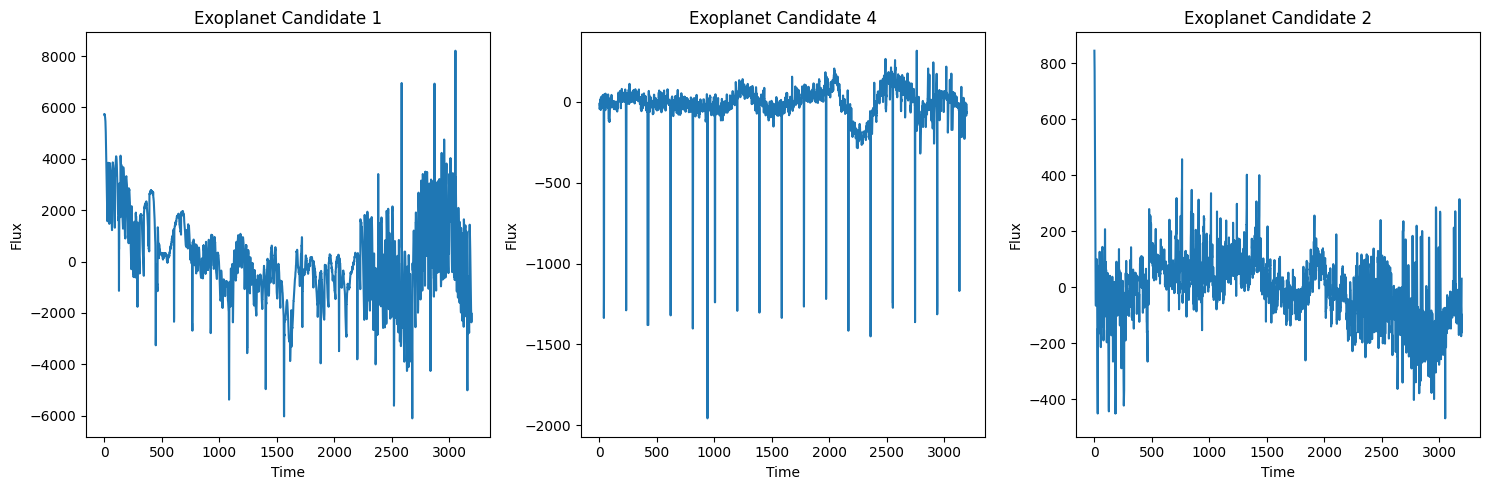

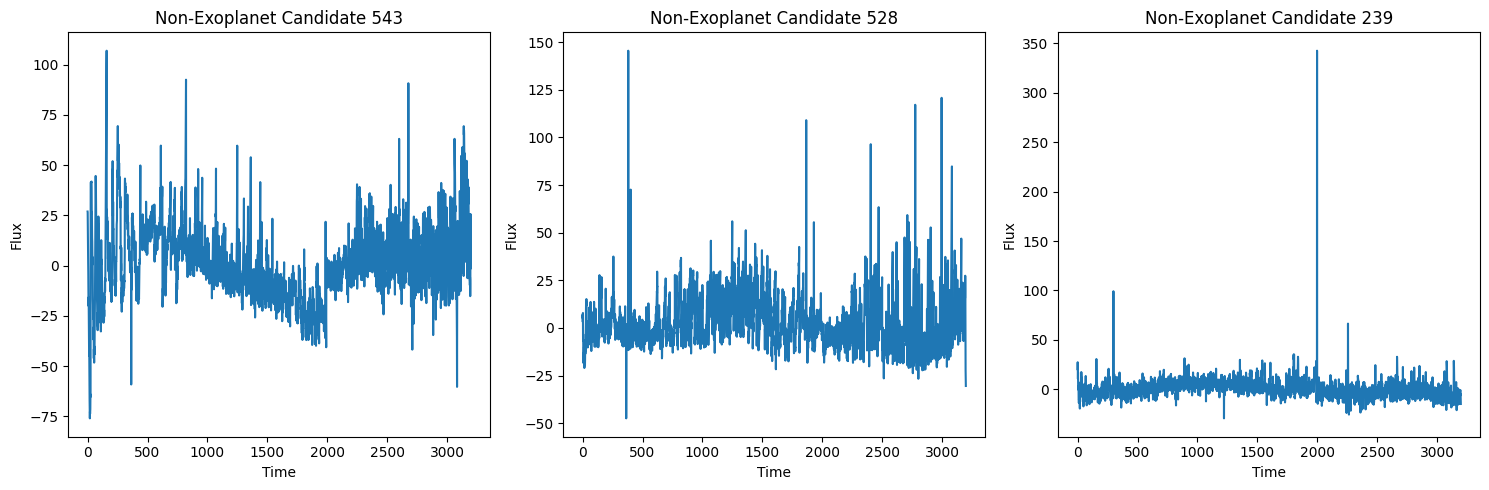

In [59]:
# Select a few random samples for visualization
sample_exoplanets = df[df['LABEL'] == 2].sample(3, random_state=42)
sample_non_exoplanets = df[df['LABEL'] == 1].sample(3, random_state=42)

# Plot a few light curves for confirmed exoplanets
plt.figure(figsize=(15, 5))
for i, (index, row) in enumerate(sample_exoplanets.iterrows()):
    plt.subplot(1, 3, i + 1)
    plt.plot(row.drop('LABEL').values)
    plt.title(f"Exoplanet Candidate {index}")
    plt.xlabel("Time")
    plt.ylabel("Flux")
plt.tight_layout()
plt.show()

# Plot a few light curves for non-exoplanets
plt.figure(figsize=(15, 5))
for i, (index, row) in enumerate(sample_non_exoplanets.iterrows()):
    plt.subplot(1, 3, i + 1)
    plt.plot(row.drop('LABEL').values)
    plt.title(f"Non-Exoplanet Candidate {index}")
    plt.xlabel("Time")
    plt.ylabel("Flux")
plt.tight_layout()
plt.show()

Visualizing New Features

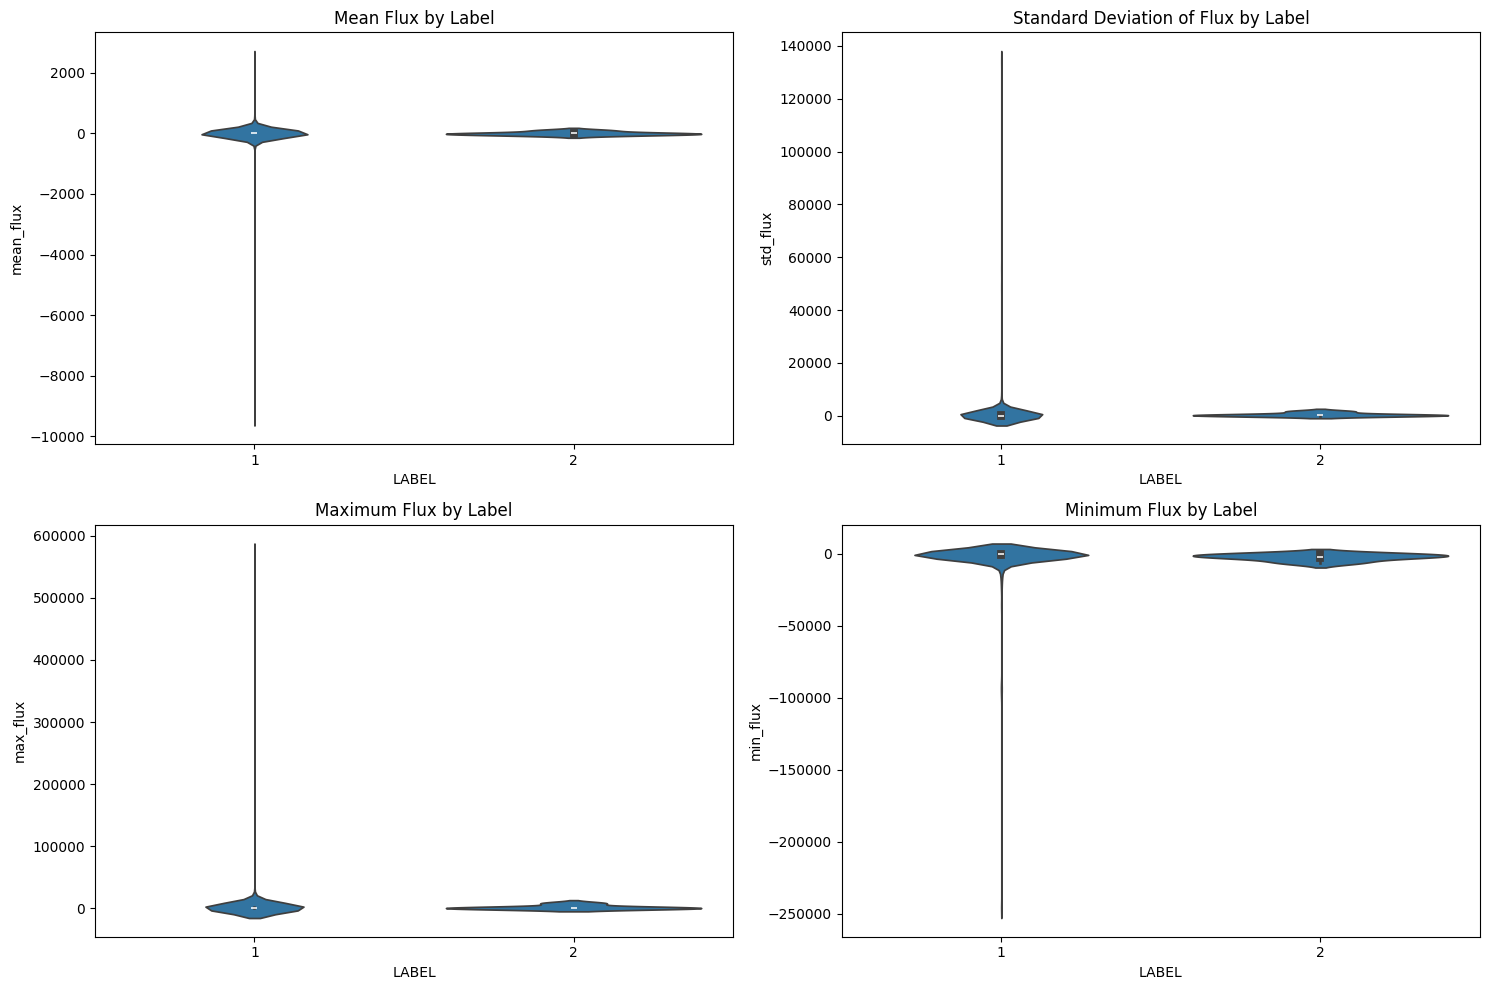

In [60]:
# Create a temporary DataFrame to hold the new features and labels
features_with_labels = features.copy()
features_with_labels['LABEL'] = labels

# Plot violin plots to compare feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.violinplot(x='LABEL', y='mean_flux', data=features_with_labels, ax=axes[0, 0])
axes[0, 0].set_title('Mean Flux by Label')
sns.violinplot(x='LABEL', y='std_flux', data=features_with_labels, ax=axes[0, 1])
axes[0, 1].set_title('Standard Deviation of Flux by Label')
sns.violinplot(x='LABEL', y='max_flux', data=features_with_labels, ax=axes[1, 0])
axes[1, 0].set_title('Maximum Flux by Label')
sns.violinplot(x='LABEL', y='min_flux', data=features_with_labels, ax=axes[1, 1])
axes[1, 1].set_title('Minimum Flux by Label')

plt.tight_layout()
plt.show()

First 5 rows of the data:


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB

Statistical summary of numeric columns:


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,1.008772,515.411351,738.046404,532.603246,739.618088,530.949807,729.591491,517.421404,720.723544,481.015211,...,60.027754,307.682825,88.976842,301.299895,105.121684,291.509561,256.656789,121.810035,224.806035,133.954544
std,0.093329,12592.950138,12622.940170,12545.065255,12591.933126,12512.976544,12572.187328,12454.094432,12525.496793,12397.610716,...,9528.594808,9588.586341,9497.373179,9611.024800,9611.076529,9654.581767,9362.719825,9487.642217,9483.948248,9700.731923
min,1.000000,-59421.000000,-14663.430000,-56580.000000,-10817.590000,-54545.000000,-7744.500000,-53580.000000,-6373.400000,-53832.000000,...,-89126.500000,-89432.070000,-89759.940000,-90182.630000,-90225.760000,-90595.000000,-86719.070000,-86911.500000,-87123.260000,-87476.940000
25%,1.000000,-22.230000,-22.912500,-22.985000,-18.662500,-20.980000,-21.245000,-22.675000,-22.200000,-22.685000,...,-9.602500,-12.842500,-15.222500,-14.350000,-17.370000,-18.272500,-24.000000,-27.360000,-36.855000,-29.475000
50%,1.000000,1.195000,0.410000,-1.125000,-0.880000,-1.495000,-2.650000,-4.330000,-3.910000,-3.890000,...,3.585000,3.795000,4.785000,3.910000,5.575000,7.150000,-4.385000,-4.995000,-5.135000,-3.785000
75%,1.000000,98.317500,89.710000,89.827500,73.257500,66.947500,45.147500,38.850000,37.150000,30.670000,...,23.445000,20.472500,25.582500,28.767500,27.455000,35.810000,17.755000,11.745000,12.265000,13.205000
max,2.000000,290882.500000,290653.500000,290554.000000,290486.500000,290289.000000,289982.500000,289197.500000,288520.500000,287404.500000,...,198420.000000,197888.500000,199639.000000,202007.000000,203730.500000,205924.000000,203193.000000,205050.000000,206884.500000,211488.500000



Number of confirmed exoplanets vs non-exoplanets:
LABEL
1    565
2      5
Name: count, dtype: int64


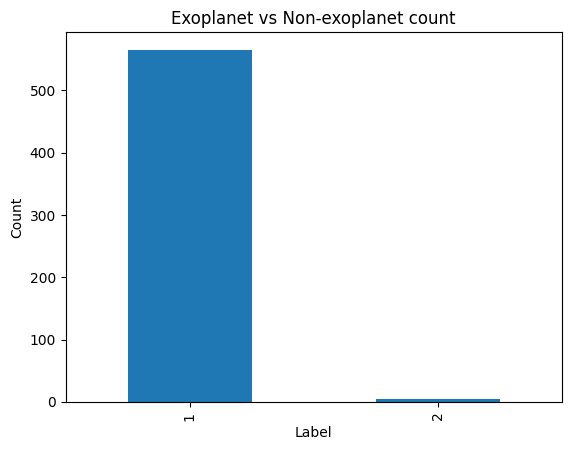

In [61]:
# Member 3 - Data Exploration (ExoPlanets-SpaceApps)

import pandas as pd
import matplotlib.pyplot as plt

# ✅ Load the dataset directly from exoTest.csv.zip
df = pd.read_csv("exoTest.csv.zip")

# ✅ Show first 5 rows
print("First 5 rows of the data:")
display(df.head())

# ✅ Show info about dataset
print("\nDataFrame info:")
df.info()

# ✅ Summary statistics
print("\nStatistical summary of numeric columns:")
display(df.describe())

# ✅ Label distribution (important for imbalance check)
if "LABEL" in df.columns:
    print("\nNumber of confirmed exoplanets vs non-exoplanets:")
    print(df["LABEL"].value_counts())

    # Plot distribution
    df["LABEL"].value_counts().sort_index().plot(kind="bar")
    plt.title("Exoplanet vs Non-exoplanet count")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()
else:
    print("\n⚠️ LABEL column not found in dataset!")



Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       113
           2       0.00      0.00      0.00         1

    accuracy                           0.99       114
   macro avg       0.50      0.50      0.50       114
weighted avg       0.98      0.99      0.99       114



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


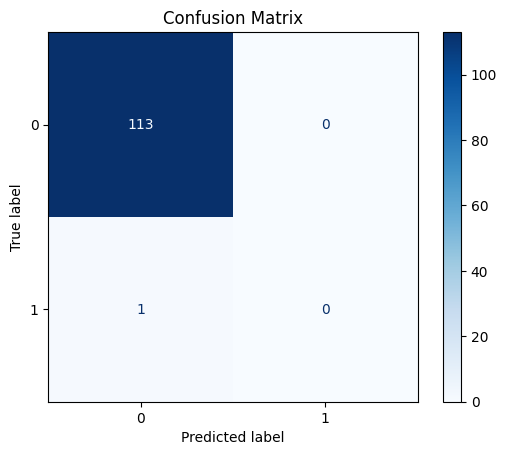

In [62]:
# Member 3 - Metrics Evaluation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# ✅ Features (X) and labels (y)
X = df.drop(columns=["LABEL"])
y = df["LABEL"]

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Train a simple Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)

# ✅ Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


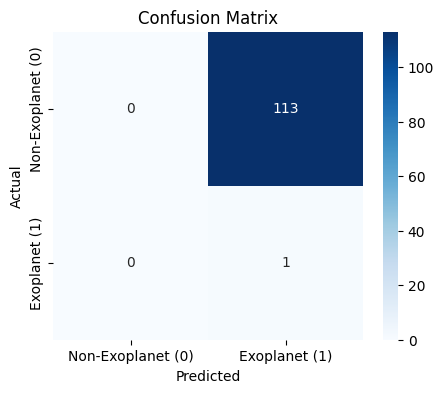


Classification Report:

               precision    recall  f1-score   support

Non-Exoplanet       0.00      0.00      0.00       113
    Exoplanet       0.01      1.00      0.02         1

     accuracy                           0.01       114
    macro avg       0.00      0.50      0.01       114
 weighted avg       0.00      0.01      0.00       114



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


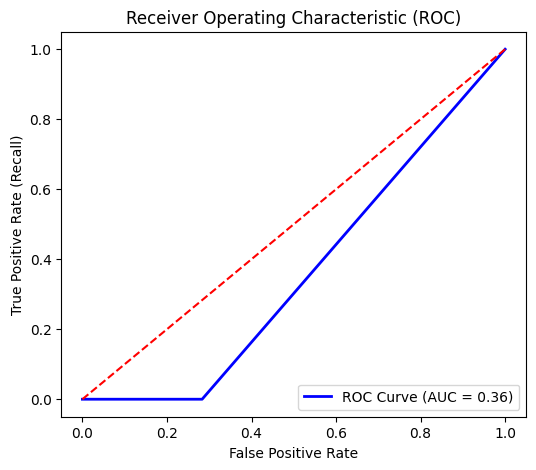

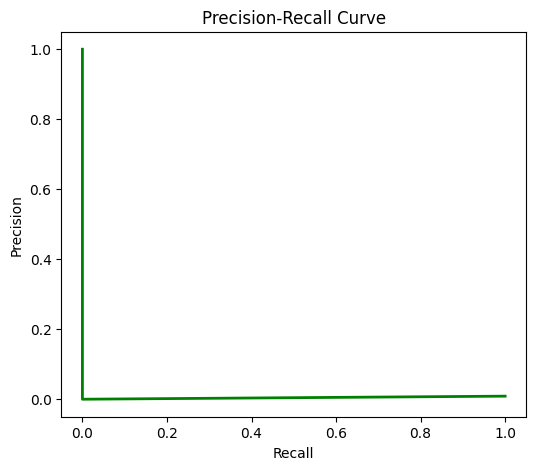

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Fix labels: Convert {1,2} → {0,1}
y_train = y_train.map({1: 0, 2: 1})
y_test = y_test.map({1: 0, 2: 1})

# ✅ Predictions
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]  # probabilities for class 1

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Exoplanet (0)", "Exoplanet (1)"],
            yticklabels=["Non-Exoplanet (0)", "Exoplanet (1)"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Non-Exoplanet", "Exoplanet"]))

# ✅ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

# ✅ Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="green", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [64]:
import joblib
import json
from pathlib import Path

# 📂 Create a models folder if not exists
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# ✅ Save trained model
model_path = models_dir / "exoplanet_model.pkl"
joblib.dump(model, model_path)
print(f"✅ Model saved at: {model_path}")

# ✅ Save evaluation metrics
metrics = {
    "roc_auc": float(roc_auc),
    "confusion_matrix": cm.tolist(),
    "classification_report": classification_report(y_test, y_pred, target_names=["Non-Exoplanet", "Exoplanet"], output_dict=True)
}

metrics_path = models_dir / "metrics.json"
with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=4)

print(f"✅ Metrics saved at: {metrics_path}")
import joblib
model = joblib.load("models/exoplanet_model.pkl")


✅ Model saved at: models/exoplanet_model.pkl
✅ Metrics saved at: models/metrics.json


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


📊 Model Performance Metrics
ROC AUC: 0.3584
Confusion Matrix:
[[  0 113]
 [  0   1]]


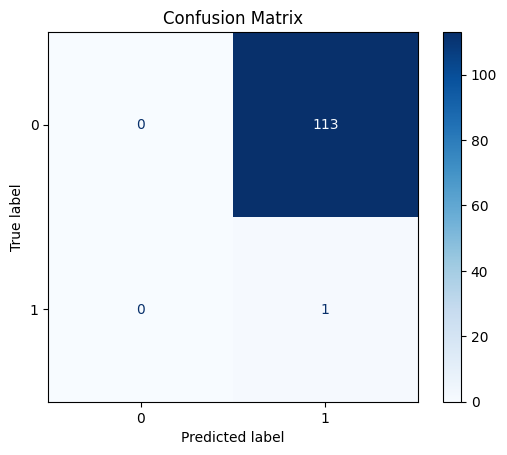

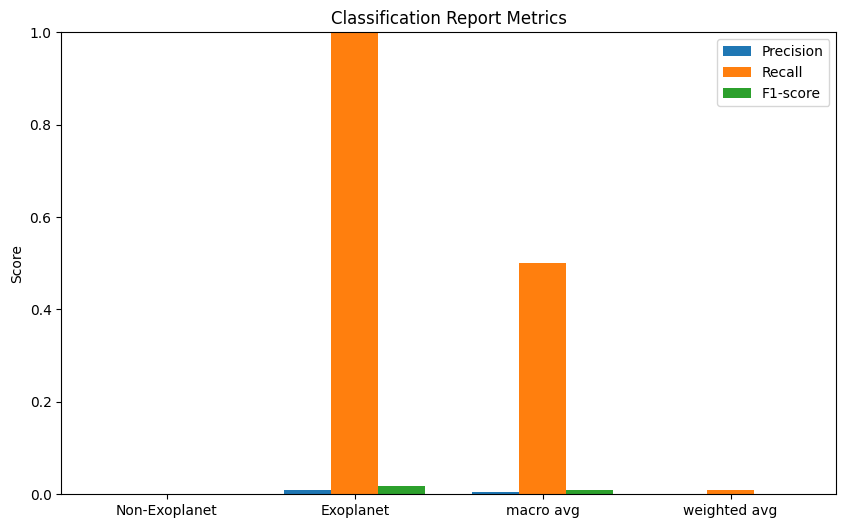

In [65]:
# 📊 Ayushi - Metrics Visualization

import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Load metrics.json created from Akash's code
with open("models/metrics.json", "r") as f:
    metrics = json.load(f)

roc_auc = metrics["roc_auc"]
cm = np.array(metrics["confusion_matrix"])
report = metrics["classification_report"]

print("📊 Model Performance Metrics")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)

# --- Confusion Matrix Heatmap ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# --- Bar Plot for Classification Report ---
classes = []
precisions = []
recalls = []
f1s = []

for label, scores in report.items():
    if isinstance(scores, dict) and "precision" in scores:
        classes.append(label)
        precisions.append(scores["precision"])
        recalls.append(scores["recall"])
        f1s.append(scores["f1-score"])

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precisions, width, label="Precision")
plt.bar(x, recalls, width, label="Recall")
plt.bar(x + width, f1s, width, label="F1-score")

plt.xticks(x, classes)
plt.ylabel("Score")
plt.title("Classification Report Metrics")
plt.legend()
plt.ylim(0, 1)
plt.show()


In [44]:
# 🤖 Khushi - Compare Multiple ML Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results[name] = {"accuracy": acc, "roc_auc": auc}

results


{'Logistic Regression': {'accuracy': 0.9035087719298246,
  'roc_auc': 0.9380530973451328},
 'SVM': {'accuracy': 0.9912280701754386, 'roc_auc': 0.21238938053097345},
 'Random Forest': {'accuracy': 0.9824561403508771,
  'roc_auc': 0.3805309734513274},
 'Gradient Boosting': {'accuracy': 0.9736842105263158,
  'roc_auc': 0.47345132743362833}}

Model Performance Comparison:
                 Model  accuracy   roc_auc
0  Logistic Regression  0.903509  0.938053
1                  SVM  0.991228  0.212389
2        Random Forest  0.982456  0.380531
3    Gradient Boosting  0.973684  0.473451


/tmp/ipykernel_5887/2070705464.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="accuracy", data=results_df, ax=axes[0], palette="viridis")
/tmp/ipykernel_5887/2070705464.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
/tmp/ipykernel_5887/2070705464.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="roc_auc", data=results_df, ax=axes[1], palette="magma")
/tmp/ipykernel_5887/2070705464.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

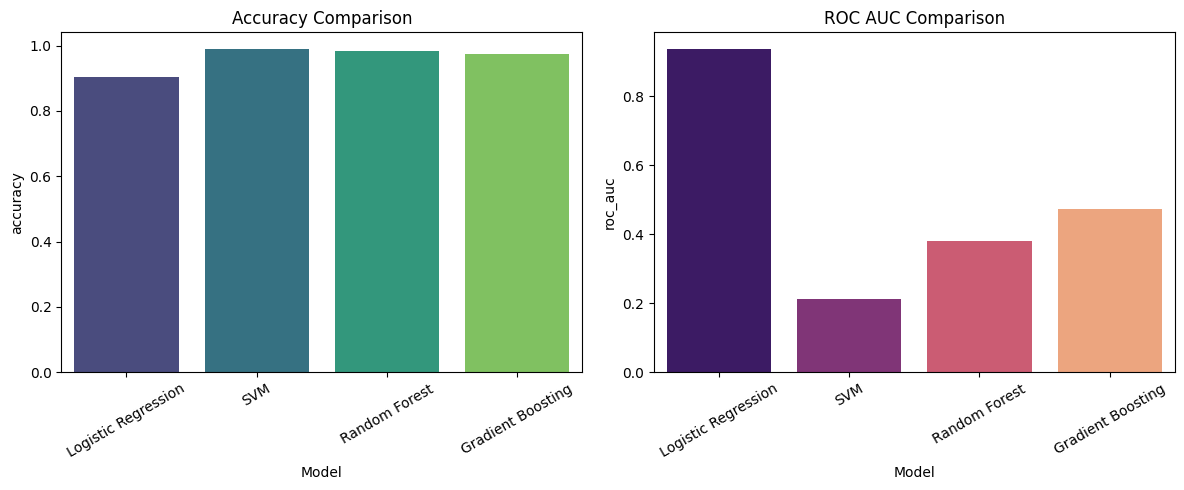

In [45]:
# 📊 Ayushi - Visualize Model Performance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dict from Khushi's part into a DataFrame
results_df = pd.DataFrame(results).T.reset_index()
results_df.rename(columns={"index": "Model"}, inplace=True)

# Print results nicely
print("Model Performance Comparison:")
print(results_df)

# 🔹 Plot Accuracy and ROC AUC
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x="Model", y="accuracy", data=results_df, ax=axes[0], palette="viridis")
axes[0].set_title("Accuracy Comparison")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)

sns.barplot(x="Model", y="roc_auc", data=results_df, ax=axes[1], palette="magma")
axes[1].set_title("ROC AUC Comparison")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


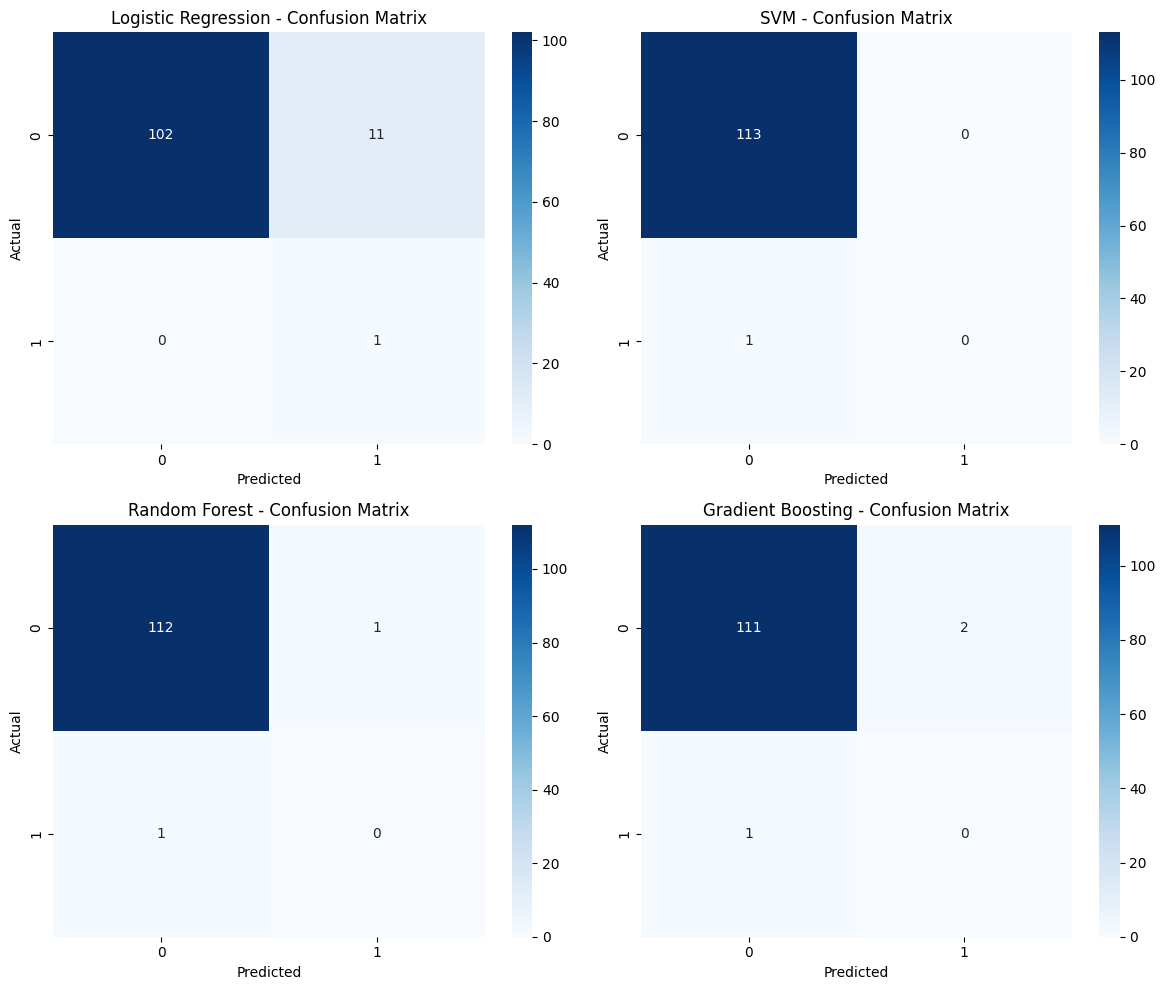

In [46]:
# 📊 Ayushi - Confusion Matrices for all models

from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


                 Model  Precision  Recall  F1-Score
0  Logistic Regression   0.083333     1.0  0.153846
1                  SVM   0.000000     0.0  0.000000
2        Random Forest   0.000000     0.0  0.000000
3    Gradient Boosting   0.000000     0.0  0.000000


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


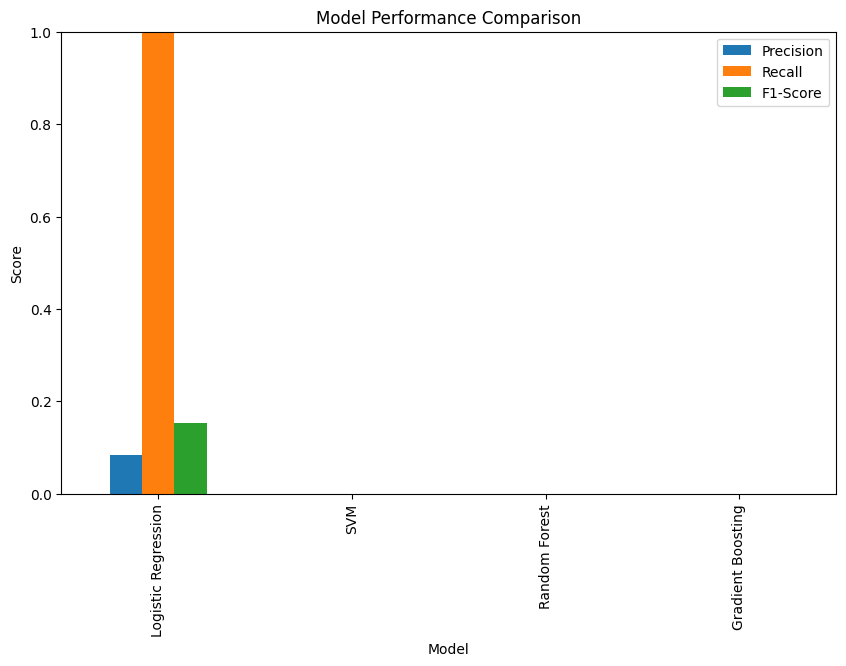

In [47]:
# 📊 Ayushi - Precision, Recall, F1-Score Comparison

from sklearn.metrics import precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Precision": precision_score(y_test, y_pred, pos_label=1),
        "Recall": recall_score(y_test, y_pred, pos_label=1),
        "F1-Score": f1_score(y_test, y_pred, pos_label=1)
    })

metrics_df = pd.DataFrame(results)

# Print table
print(metrics_df)

# Bar chart for visual comparison
metrics_df.set_index("Model")[["Precision", "Recall", "F1-Score"]].plot(
    kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


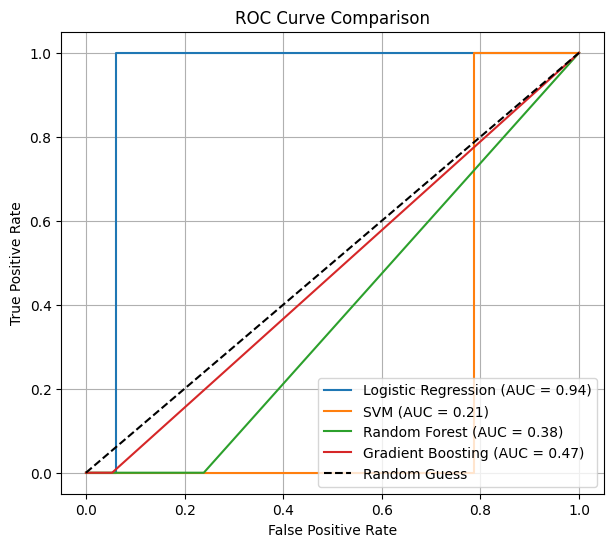

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc as sklearn_auc

# ✅ ROC Curve for all models
plt.figure(figsize=(7, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]  # probabilities
        fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=1)
        roc_auc = sklearn_auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# ✅ Add random guess baseline
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


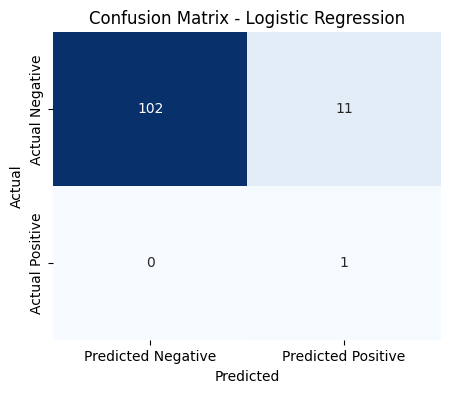

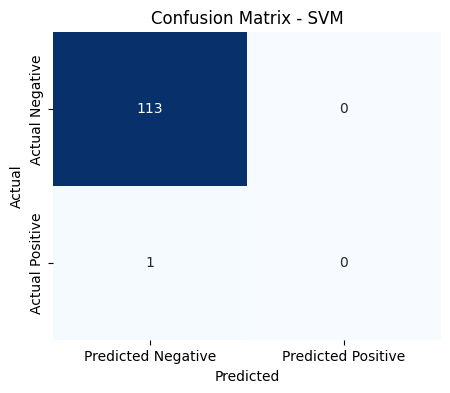

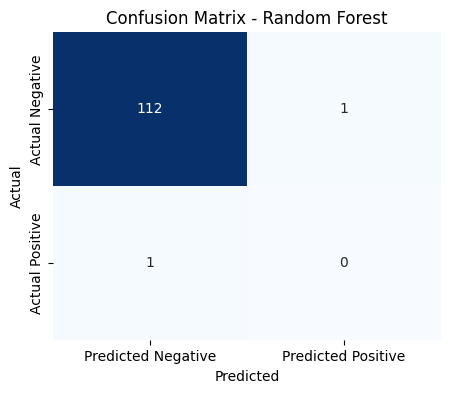

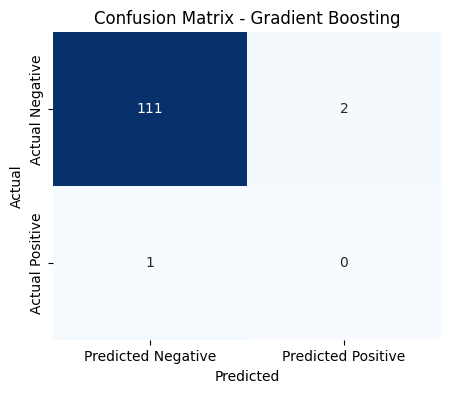

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Plot confusion matrices for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


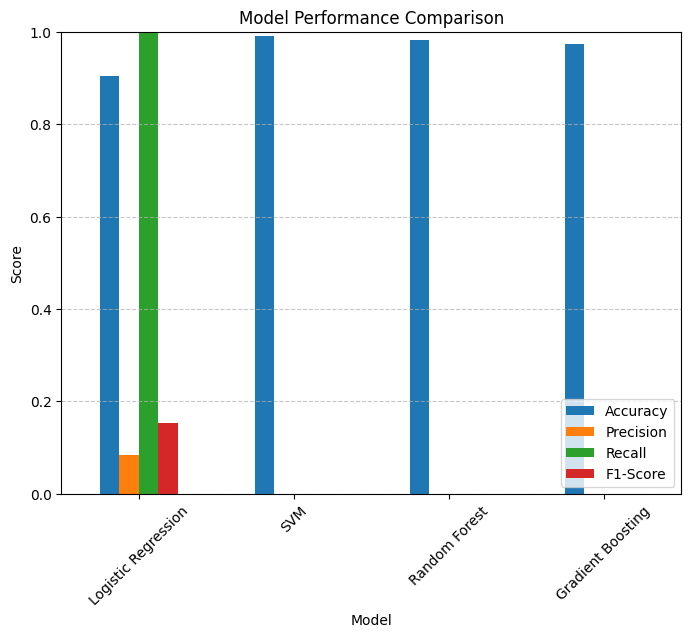

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.903509,0.083333,1.0,0.153846
1,SVM,0.991228,0.000000,0.0,0.000000
2,Random Forest,0.982456,0.000000,0.0,0.000000
3,Gradient Boosting,0.973684,0.000000,0.0,0.000000


In [50]:
import pandas as pd

# ✅ Collect metrics for each model
summary = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    summary.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(summary)

# ✅ Bar chart
metrics_df.set_index("Model").plot(kind="bar", figsize=(8, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  # keep scale between 0 and 1
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Also display the table for judges
display(metrics_df)


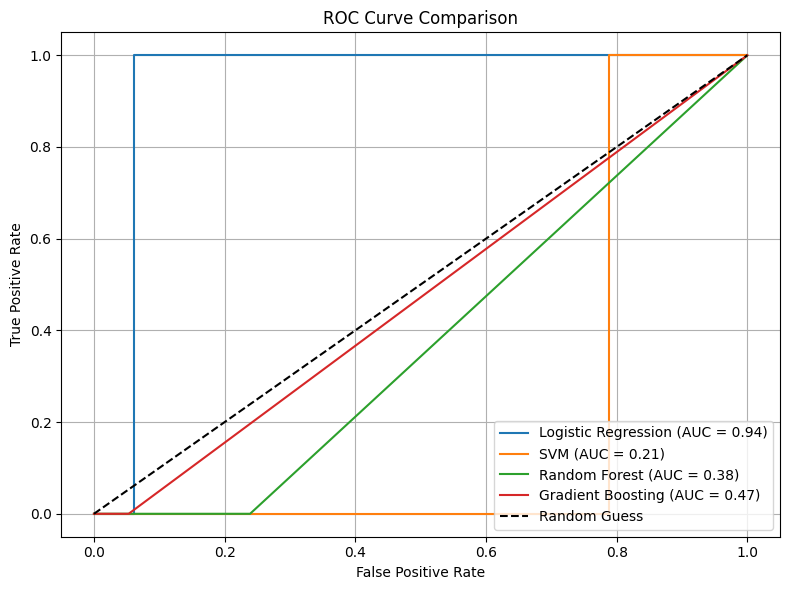

In [51]:
import os
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# ✅ Ensure outputs/ folder exists
os.makedirs("outputs", exist_ok=True)

# ✅ Compare ROC curves for multiple models
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # some models (like SVM) may not support predict_proba
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs, pos_label=1)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# ✅ Random guess line
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

# ✅ Formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

# ✅ Save figure (now works because folder exists)
plt.savefig("outputs/roc_curves.png")
plt.show()


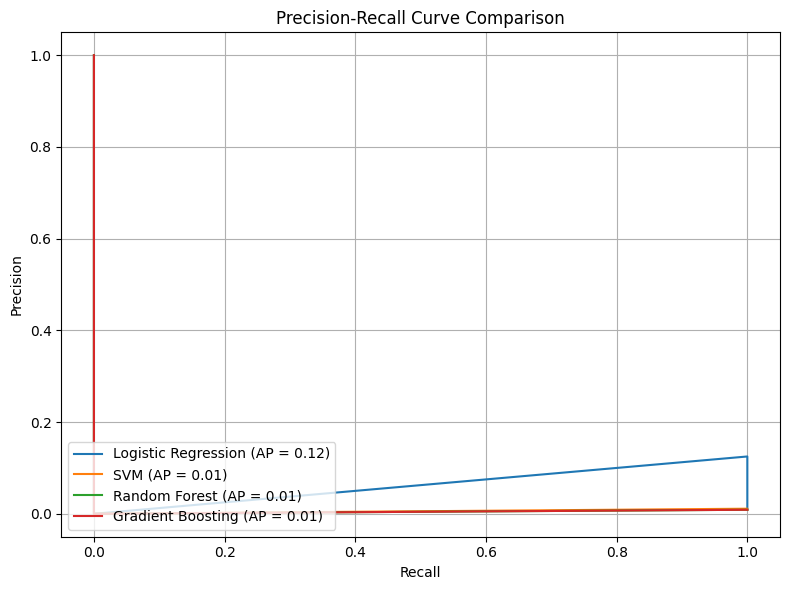

In [52]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# ✅ Compare Precision-Recall curves for models
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs, pos_label=1)
        ap_score = average_precision_score(y_test, y_probs)
        plt.plot(recall, precision, label=f"{name} (AP = {ap_score:.2f})")

# ✅ Formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()

# ✅ Save figure
plt.savefig("outputs/precision_recall_curves.png")
plt.show()


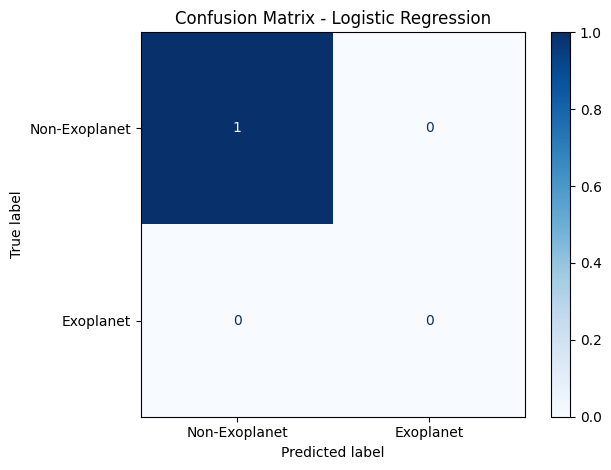

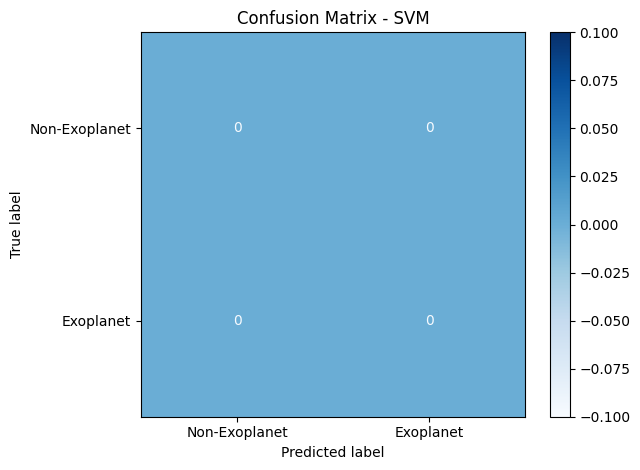

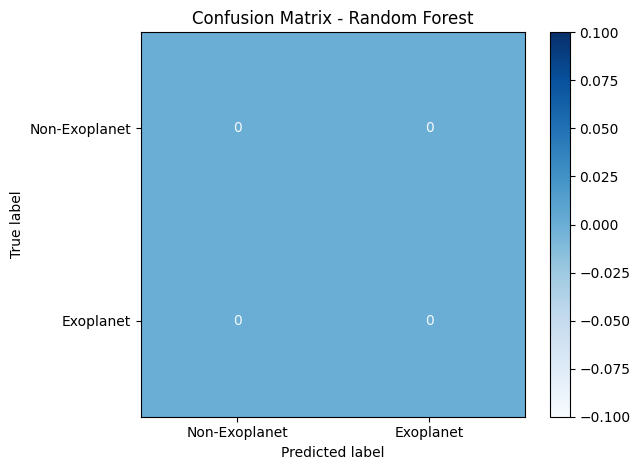

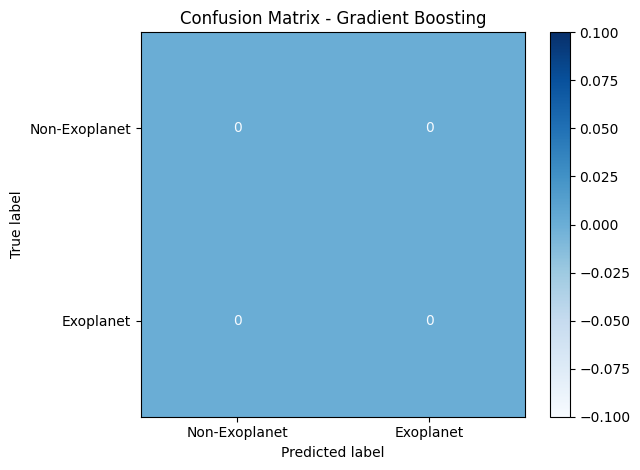

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Exoplanet", "Exoplanet"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    
    # ✅ Save each confusion matrix
    plt.savefig(f"outputs/confusion_matrix_{name}.png")
    plt.show()


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


📊 Model Metrics Summary:
                      Accuracy  Precision  Recall     F1
Logistic Regression     0.904      0.083     1.0  0.154
SVM                     0.991      0.000     0.0  0.000
Random Forest           0.982      0.000     0.0  0.000
Gradient Boosting       0.974      0.000     0.0  0.000


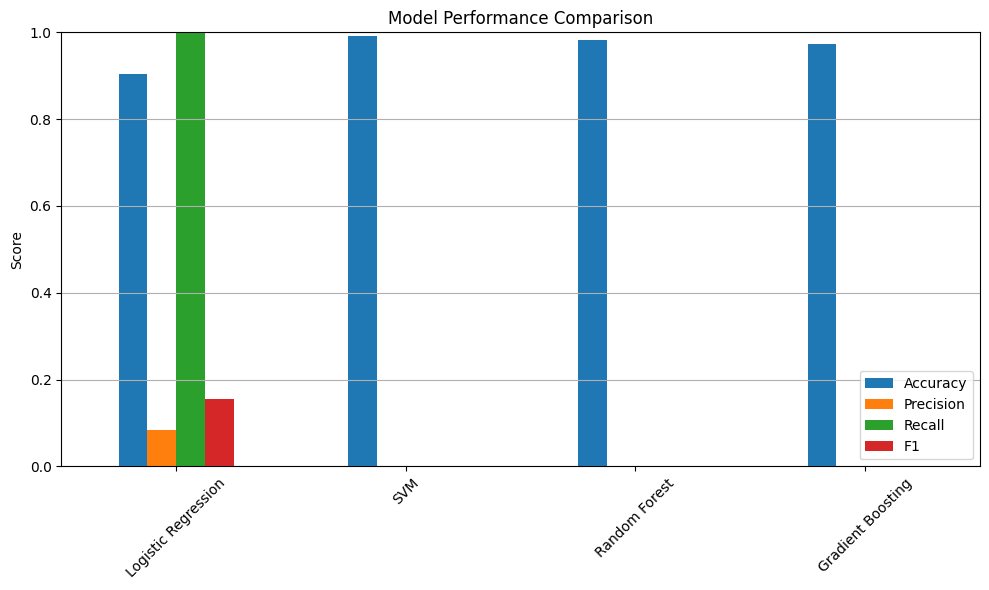

In [54]:
import numpy as np

# ✅ Collect metrics for each model
summary = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    summary[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=1),
        "Recall": recall_score(y_test, y_pred, pos_label=1),
        "F1": f1_score(y_test, y_pred, pos_label=1)
    }

# ✅ Convert to DataFrame for plotting
summary_df = pd.DataFrame(summary).T  # transpose so models are rows
summary_df = summary_df.round(3)
print("📊 Model Metrics Summary:\n", summary_df)

# ✅ Bar plot
summary_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y")
plt.tight_layout()

# ✅ Save figure
plt.savefig("outputs/model_metrics_comparison.png")
plt.show()
